In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
btc_1h = pd.read_csv ('./datasets_bot/btc_1h_backtest.csv', encoding='unicode_escape')

In [8]:
#Cleaning the time column
def cleaning_time(btc_1h):
    btc_1h['time'] = btc_1h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
    btc_1h['time'] = pd.to_datetime(btc_1h["time"])
    btc_1h.set_index("time", inplace = True)
    return btc_1h

In [9]:
cleaning_time(btc_1h)
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI
time,,,,,,,,,,,,
2021-01-01 01:00:00,28990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,917.494,NaN,NaN
2021-01-01 02:00:00,29411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927.830,NaN,NaN
2021-01-01 03:00:00,29218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931.537,NaN,NaN
2021-01-01 04:00:00,29303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.535,NaN,NaN
2021-01-01 05:00:00,29229.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.549,NaN,NaN


In [12]:
#Taking random sample
btc_1h= btc_1h[1500:7000]
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI
time,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778


In [20]:
#Long Trading Strategy
#Buy when RSI< 20 and Lower ATR 3 > Close
#Sell when RSI > 55 and Upper ATR 1 < Close
def buy_long(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20 and btc_1h['close'][i] <= btc_1h['Lower ATR 3'][i]):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h ['RSI'][i] > 55 and btc_1h['close'][i] >= btc_1h['Upper ATR 1'][i]):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [21]:
buy_long = buy_long(btc_1h)
btc_1h['Buy Signal Price (L)'] = buy_long[0]
btc_1h['Sell Signal Price (L)'] = buy_long[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L)
time,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN


In [37]:
#Long Strategy Visualization
def backtesting_long_visualization(): 
    plt.style.use('classic')
    plt.figure(figsize=(12,5))
    plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
    plt.plot(btc_1h['Buy Signal Price (L)'], label='', alpha=0.35)
    plt.plot(btc_1h['Sell Signal Price (L)'],label='', alpha=0.35)
    plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (L)'], label ='Open Long', marker='^',color='green')
    plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (L)'],label='Close Long', marker='v', color='red')
    plt.title('BTC (1h) Buy and Sell Signals')
    plt.xlabel("Mar,2021 - Nov,2021")
    plt.ylabel("Adj Close Price USD($)")
    plt.legend(loc='lower left')
    return plt.show()

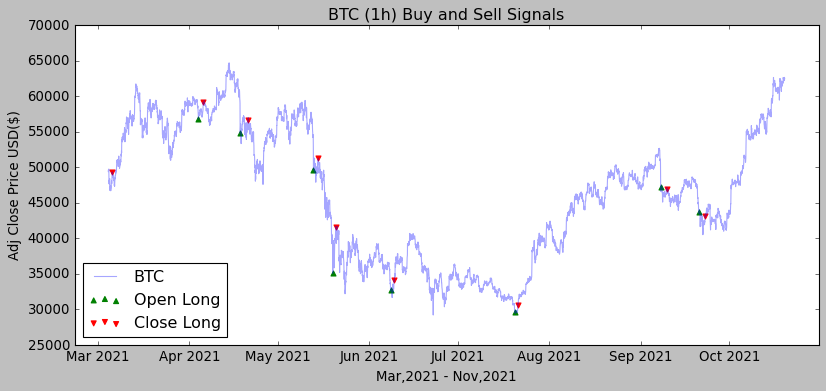

In [38]:
backtesting_long_visualization()

In [26]:
#Short Trading Strategy
#Sell when RSI > 80 and Upper ATR 3 < Close
#Buy when RSI < 45 and BTC EMA 1 < BTC EMA 2
def sell_short(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['close'][i] >= btc_1h ["Upper ATR 3"][i] and btc_1h ['RSI'][i] > 80):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h["RSI"][i] < 45 and btc_1h ['EMA 1'][i] < btc_1h ['EMA 2'][i]):
      if flag != 0:
        sigPriceBuy.append(btc_1h["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [27]:
sell_short = sell_short(btc_1h)
btc_1h['Sell Signal Price (S)'] = sell_short[0]
btc_1h['Buy Signal Price (S)'] = sell_short[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Sell Signal Price (S),Buy Signal Price (S)
time,,,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN,NaN,49391.5
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN,NaN,NaN


In [28]:
btc_1h.describe()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Sell Signal Price (S),Buy Signal Price (S)
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,8.000000,9.000000,9.000000,10.000000
mean,46441.467909,46433.319980,46419.219975,46966.755825,45871.684124,47514.291675,45324.148274,48061.827525,44776.612424,2128.202735,5.125927e+01,51.161631,43683.875000,45880.333333,50299.222222,49782.400000
std,9286.804470,9262.931860,9223.409541,9262.192131,9190.281788,9306.558861,9162.870205,9356.430296,9141.226215,2356.919257,3.314956e+01,12.349406,10252.165168,9535.936615,11842.513297,10513.380072
min,29216.500000,29680.507330,29815.961530,30048.048090,29570.367970,30280.134650,29320.202490,30512.221210,28866.497710,136.332000,-2.130000e-14,12.911394,29599.500000,30630.000000,32101.000000,32129.000000
25%,37773.750000,37777.031195,37750.055842,38538.446375,36957.445587,39091.717935,36230.078103,39653.013903,35553.491357,853.761250,1.979447e+01,42.820409,34478.250000,41657.500000,39270.000000,41749.250000
50%,47091.000000,47119.083640,47075.003000,47560.791305,46602.309410,48024.451005,46157.452670,48461.366730,45652.454495,1553.892000,5.107146e+01,51.227844,45477.750000,46985.000000,54522.000000,51697.750000
75%,55158.125000,55240.409265,55410.793895,56034.389863,54722.874368,56635.881515,54041.812170,57237.999500,53378.632865,2570.175500,8.370787e+01,59.754912,50905.500000,51237.000000,61200.000000,58546.000000
max,64659.500000,64176.529860,63682.513780,64333.074710,63031.952850,65023.991850,62388.941890,65786.139590,61771.101990,53613.055000,1.000000e+02,90.804055,56779.000000,59149.500000,62990.500000,62453.500000


In [35]:
#Short Strategy Visualization
def backtesting_short_visualization():
    plt.style.use('classic')
    plt.figure(figsize=(12,5))
    plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
    plt.plot(btc_1h['Buy Signal Price (S)'], label='', alpha=0.35)
    plt.plot(btc_1h['Sell Signal Price (S)'],label='', alpha=0.35)
    plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (S)'], label ='Close Short', marker='^',color='red')
    plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (S)'],label='Open Short', marker='v', color='green')
    plt.title('BTC (1h) Buy and Sell Signals')
    plt.xlabel("Mar, 2021 - Nov, 2021")
    plt.ylabel("Adj Close Price USD($)")
    plt.legend(loc='lower left')
    return plt.show()

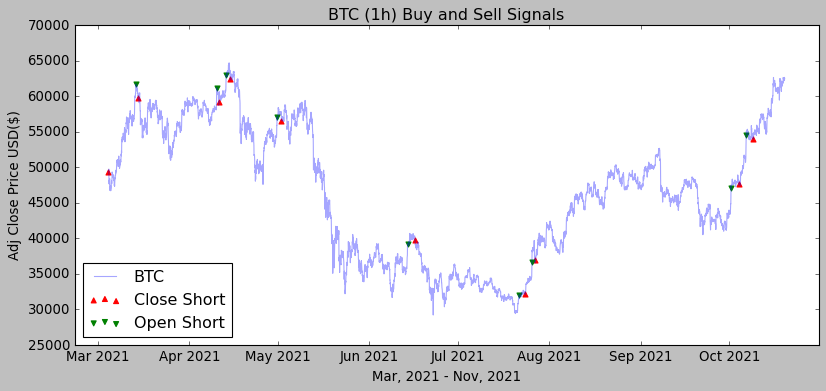

In [36]:
backtesting_short_visualization()

In [39]:
#Another Long Trading Strategy
#Buy when RSI < 20 and K > 10 
#Sell when RSI > 55
def buy_long_2(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20 and btc_1h["K"][i] > 10):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h['RSI'][i] > 55):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [40]:
buy_long_2 = buy_long_2(btc_1h)
btc_1h['Buy Signal Price (L2)'] = buy_long_2[0]
btc_1h['Sell Signal Price (L2)'] = buy_long_2[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Sell Signal Price (S),Buy Signal Price (S),Buy Signal Price (L2),Sell Signal Price (L2)
time,,,,,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN,NaN,49391.5,NaN,NaN
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def backtesting_long_2_visualization():
    plt.style.use('classic')
    plt.figure(figsize=(12,5))
    plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
    plt.plot(btc_1h['Buy Signal Price (L2)'], label='', alpha=0.35)
    plt.plot(btc_1h['Sell Signal Price (L2)'],label='', alpha=0.35)
    plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (L2)'], label ='Open Long', marker='^',color='green')
    plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (L2)'],label='Close Long', marker='v', color='red')
    plt.title('BTC (1h) Buy and Sell Signals')
    plt.xlabel("Mar, 2021 - Nov, 2021")
    plt.ylabel("Adj Close Price USD($)")
    plt.legend(loc='lower left')
    return plt.show()  

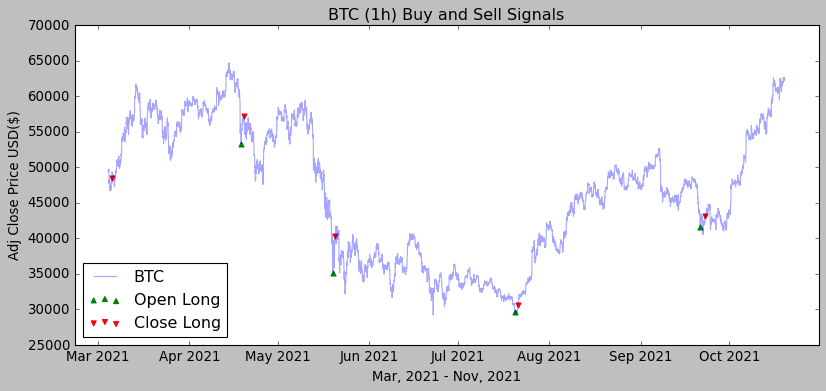

In [42]:
backtesting_long_2_visualization()